In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Jammu.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Brewers - The Coffee Bar,500,Cafe,Jammu,Old Heritage City,Café,8am to 11pm(Mon-Sun),Excellent,4.6,211
1,Humpty Dumpty,300,"Pizza,Burger,Fast Food",Jammu,Nanak Nagar,none,11am to 11pm(Mon-Sun),Excellent,4.6,231
2,RMP Restaurant,300,"Indian,Chinese",Jammu,Shastri Nagar,Quick Bites,11am to 11pm(Mon-Sun),Excellent,4.6,231
3,Nox Cafe & Bar,600,"Continental,Chinese,Italian,Modern Indian",Jammu,Trikuta Nagar,Casual Dining,12noon to 12midnight(Mon-Sun),Very Good,4.3,214
4,Domino's Pizza,700,"Pizza,Fast Food",Jammu,Trikuta Nagar,Quick Bites,11am to 11pm(Mon-Sun),Very Good,4.0,265


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
Name                219 non-null object
Price               219 non-null int64
Cuisine_Category    219 non-null object
City                219 non-null object
Region              219 non-null object
Cuisine_Type        219 non-null object
Timing              217 non-null object
Rating_Types        219 non-null object
Rating              219 non-null float64
Votes               219 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 17.2+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,219.000000,219.000000,219.000000
mean,376.484018,3.477626,40.831050
std,240.234907,0.407388,46.298233
min,0.000000,2.400000,4.000000
25%,200.000000,3.200000,9.000000
50%,300.000000,3.500000,24.000000
75%,500.000000,3.800000,51.000000
max,2000.000000,4.600000,265.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    0
City                0
Region              0
Cuisine_Type        0
Timing              2
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

Momo Hut         2
Grill Inn        2
Fun Bytes        2
Exotic Cafe      1
Papa Di Hatti    1
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Trikuta Nagar         55
Channi Himmat         42
Gandhi Nagar          24
Nanak Nagar           23
Resham Ghar Colony    14
Hari Market           12
Shastri Nagar          6
Preet Nagar            5
Lal Kuan               5
Old Heritage City      4
Name: Region, dtype: int64

Text(0.5,1,'Region')

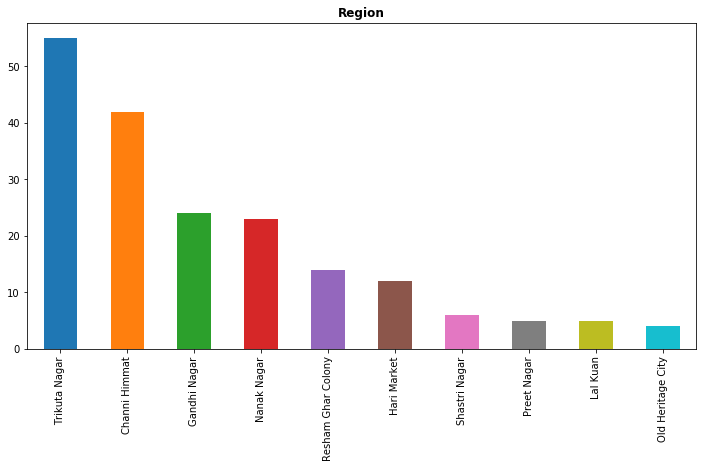

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

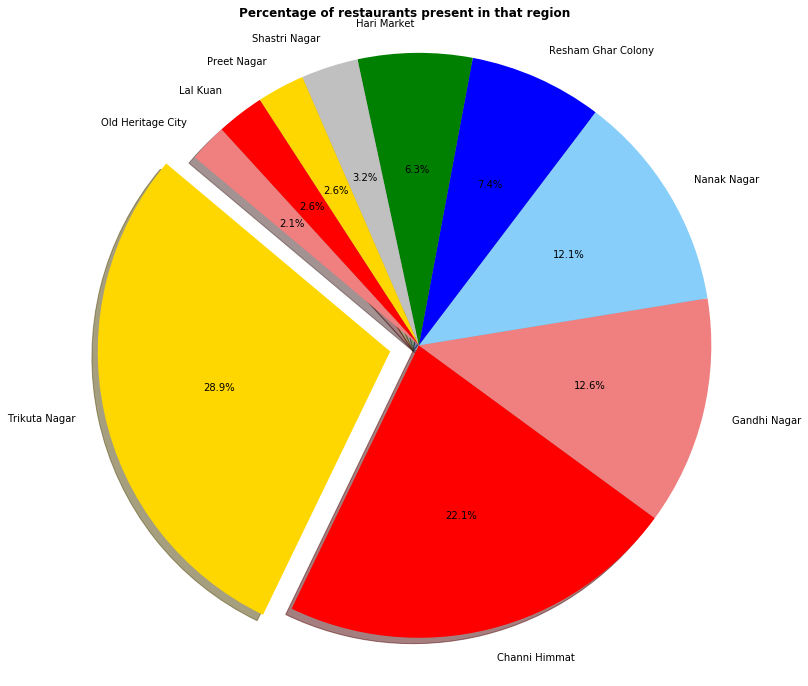

In [11]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Average      107
Good          86
Very Good     22
Excellent      3
Poor           1
Name: Rating_Types, dtype: int64

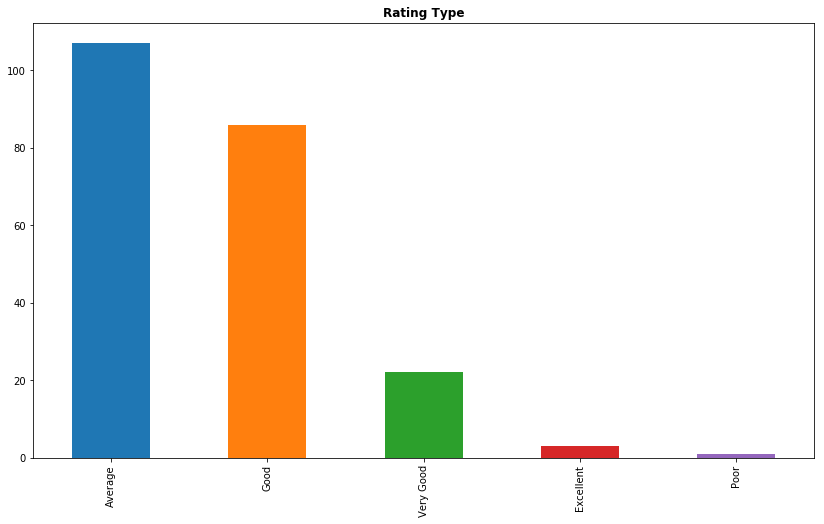

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       134
Casual Dining      33
none               12
Bakery              9
Café                7
Dessert Parlor      5
Dhaba               5
Food Court          4
Beverage Shop       4
Fine Dining         3
Name: Cuisine_Type, dtype: int64

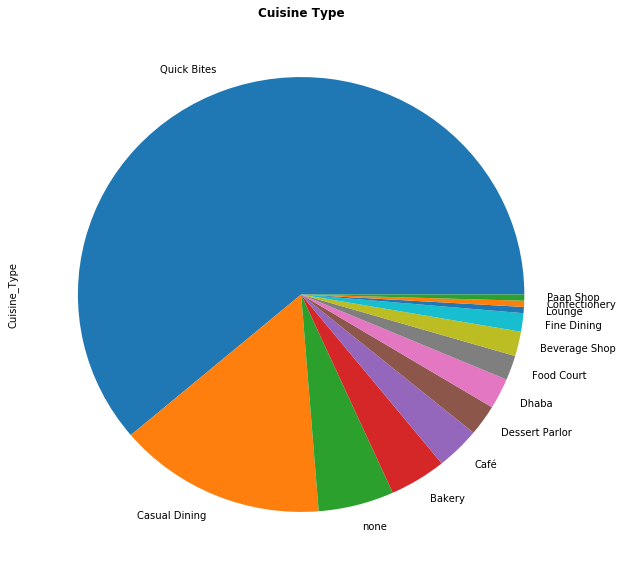

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [16]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [17]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [18]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.478341013824885


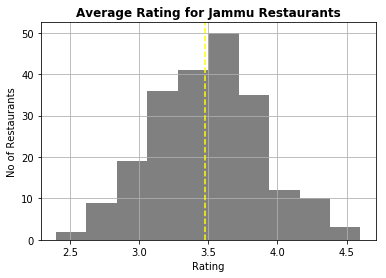

In [19]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Jammu Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [21]:
#Average rating per restaurant in Jammu is found to be around 3.4

# Top cuisines in Jammu

In [23]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

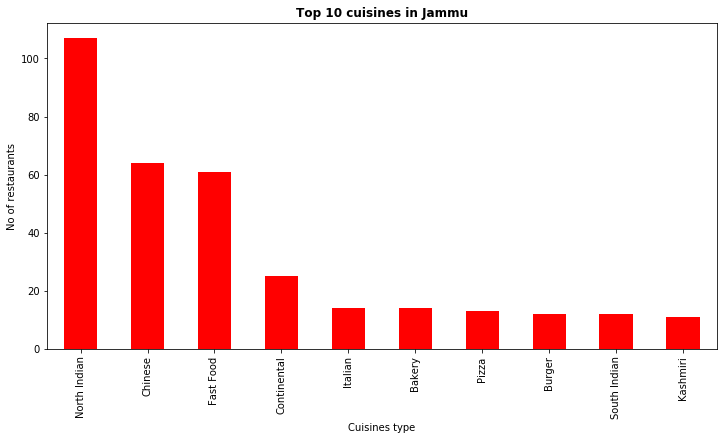

In [24]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Jammu',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [25]:
data['Price'].value_counts()[:20]

300     46
200     36
500     29
400     28
250     16
600     13
150     12
100      9
350      7
700      6
1000     4
800      2
650      2
0        2
1400     1
900      1
1200     1
2000     1
1300     1
Name: Price, dtype: int64

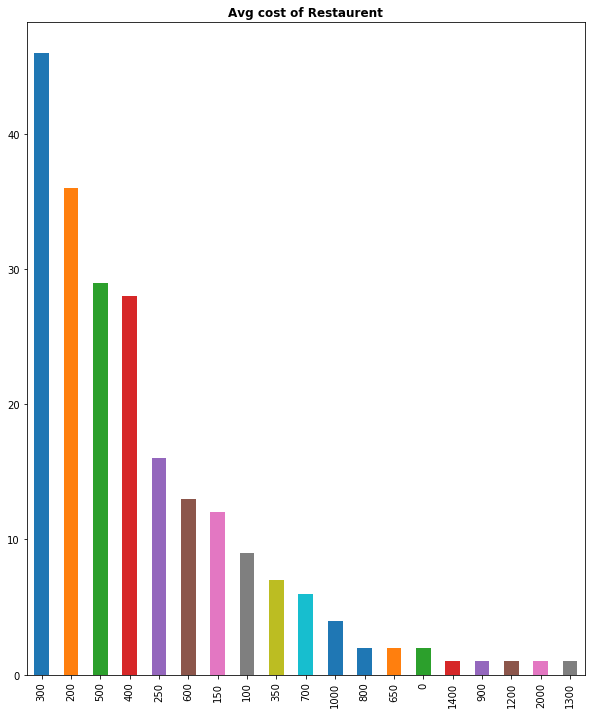

In [26]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [27]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

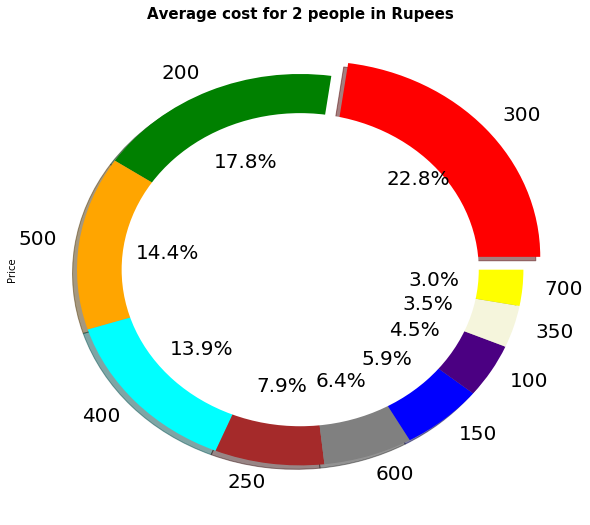

In [28]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 300